#  Data Preprocessing Code

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'C:\\Users\\navee\\Desktop\\project intern1\\DATASET\\ml project.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())

# Encoding categorical data
label_encoder = LabelEncoder()
dataset['CarType'] = label_encoder.fit_transform(dataset['CarType'])

# Convert numeric values back to original categorical values
#dataset['CarType_Categorical'] = label_encoder.inverse_transform(dataset['CarType'])

# Split the data into features and target
X = dataset.drop('CarType', axis=1)
y = dataset['CarType']

#Axis 0 (index axis): Refers to rows.
#Axis 1 (columns axis): Refers to columns.


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   ManHI  ManBI  IntI  HVACi  Safety    CarType
0  -5.27  -1.30  2.86  -4.85    4.04        SUV
1  -4.82  -5.38  9.72  -0.97   -4.57  Hatchback
2   9.57  -7.50 -7.61   1.33   -5.10  Hatchback
3   2.84  -2.85  0.92   5.51   -6.64  Hatchback
4   0.00   2.68 -4.15   0.85    5.58        SUV


# Exploratory Data Analysis Plots

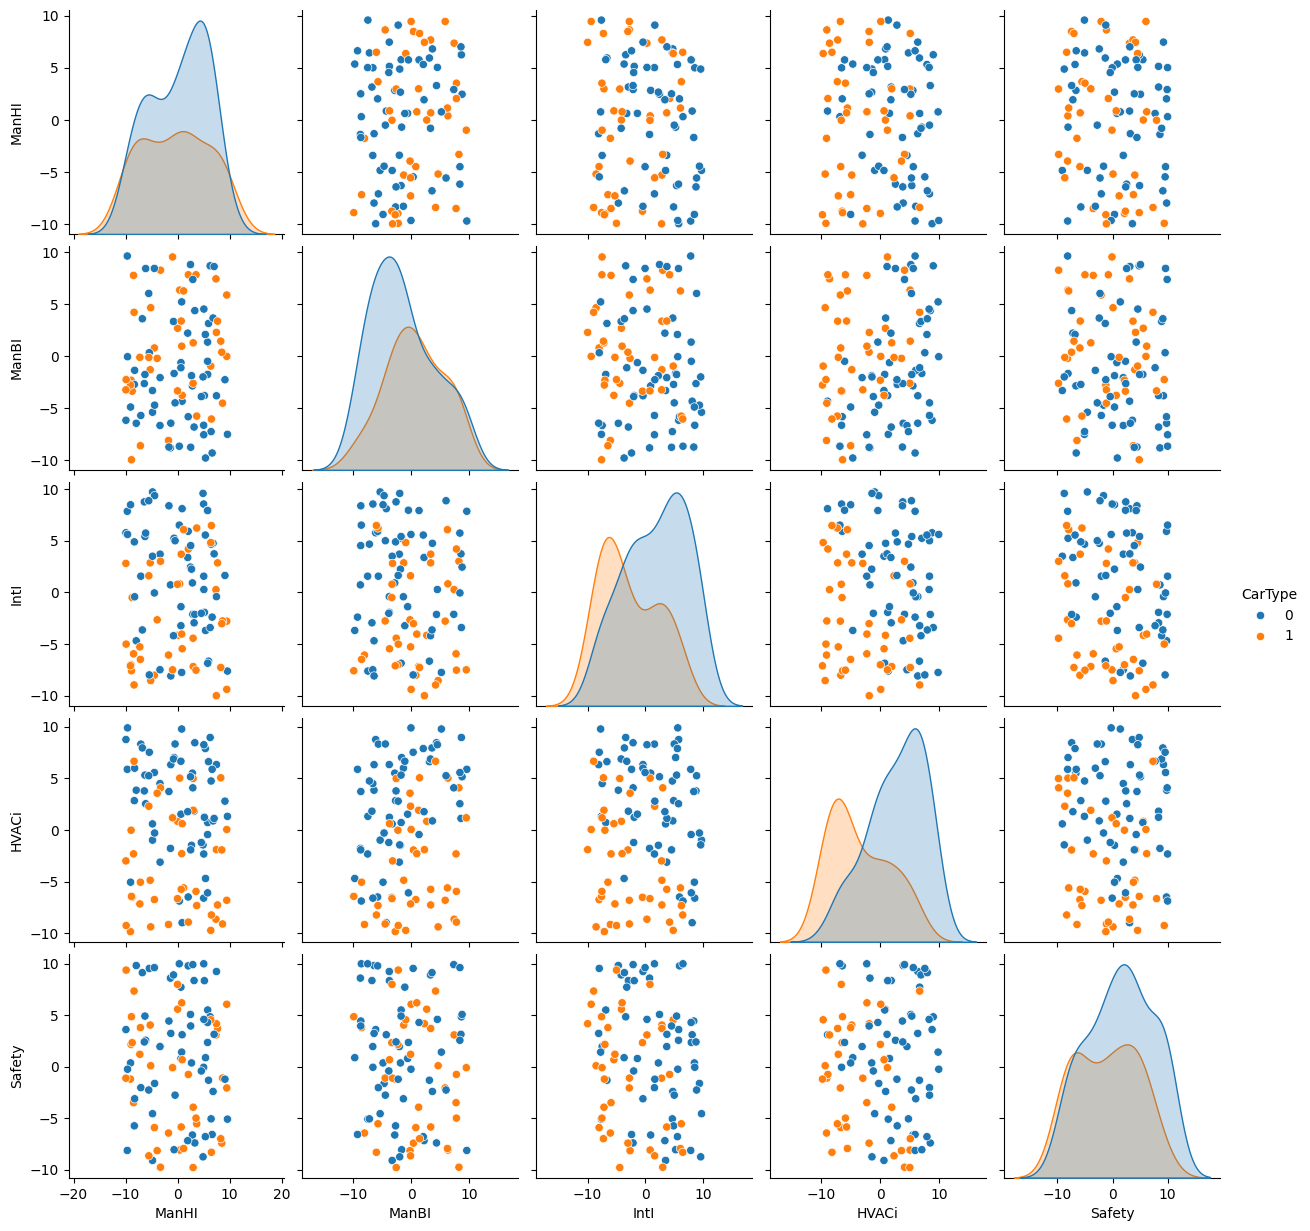

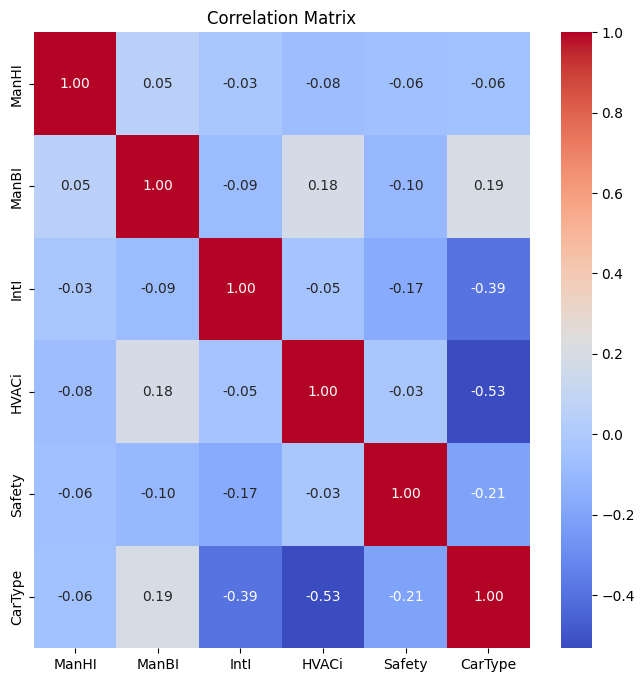

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to see the relationships between features
sns.pairplot(dataset, hue='CarType')
plt.savefig('pairplot.png')
plt.show()

# Correlation matrix
corr_matrix = dataset.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


For the "Hatchback" car type, the average values of the features are as follows:

ManHI: 0.197
ManBI: -1.514
IntI: 1.797
HVACi: 2.717
Safety: 1.465

For the "SUV" car type, the average values of the features are as follows:

ManHI: -0.459
ManBI: 0.580
IntI: -2.699
HVACi: -3.474
Safety: -1.015

# Model Training Code

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
knn = KNeighborsClassifier()

# Hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

'''
n_neighbors': Number of neighbors to use for classification.
3, 5, 7, 9, 11: Different values of n_neighbors to try.
'weights': Weight function used in prediction.
'uniform': All points in each neighborhood are weighted equally.
'distance': Points are weighted by the inverse of their distance, closer neighbors have more influence.

'''
'''GridSearchCV(knn, param_grid, cv=5, scoring='accuracy'): Initializes the grid search.
knn: The K-Nearest Neighbors classifier to be tuned.
param_grid: The hyperparameter grid to search.
cv=5: 5-fold cross-validation is used to evaluate each combination of parameters.
scoring='accuracy': Accuracy is used as the metric to evaluate the performance of the model.

Setting cv=5 specifies 5-fold cross-validation, which means the dataset is split into 5 equal parts (folds). Here’s how it works:

Splitting Data: The data is divided into 5 subsets of equal size.
Training and Validation: The model is trained 5 times, each time using 4 folds for training and the remaining 1 fold for validation.
Repeating the Process: This process is repeated such that each fold is used once as a validation set.
Averaging Results: The performance metrics (e.g., accuracy) are averaged over the 5 iterations to get a final estimate.
'''

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Model: {best_model}")


Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best Model: KNeighborsClassifier(n_neighbors=9, weights='distance')


# Model Evaluation Results

Accuracy: 0.875
Precision: 0.9078947368421053
Recall: 0.875
F1 Score: 0.8778207607994842
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.74      1.00      0.85        14

    accuracy                           0.88        40
   macro avg       0.87      0.90      0.87        40
weighted avg       0.91      0.88      0.88        40



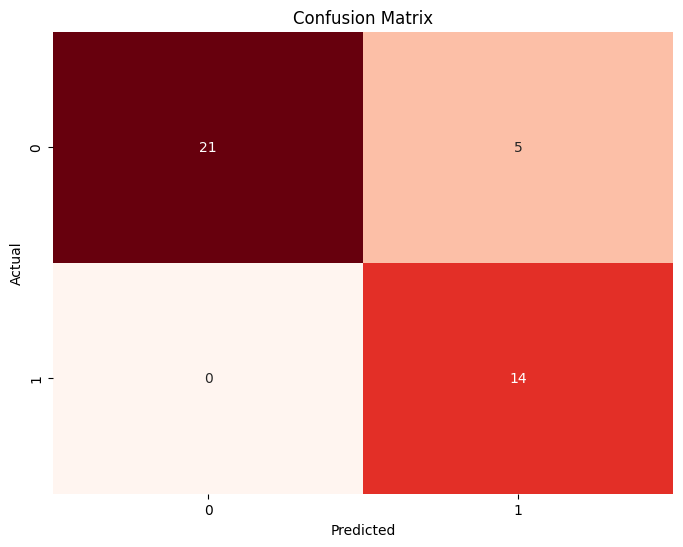

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.show()


# CUSTOM INPUT 


In [75]:
dataset['CarType'] = label_encoder.inverse_transform(dataset['CarType'])

In [78]:
import numpy as np
custom_input = np.array([[0.197,-1.514,1.797,2.717,1.465]]) #example input

# Make predictions with the trained model
custom_prediction = best_model.predict(custom_input)

print("Custom Input Prediction:", custom_prediction)

Custom Input Prediction: [0]
